In [2]:
!pip install wwo-hist

  Using cached https://files.pythonhosted.org/packages/9e/4b/e4f82813f1bd33195ca5eca204c7c312850592aba45dd819de0f2250d7fd/wwo_hist-0.0.4.tar.gz
  Stored in directory: /Users/jtone/Library/Caches/pip/wheels/c5/0e/16/329d9233f3b0b7e5fe81b09c5519a193727999c6ae77577ca9
Successfully built wwo-hist


In [3]:
from wwo_hist import retrieve_hist_data

In [1]:
import os
# os.chdir("wwo_data")

In [8]:
# get Riga weather data each day from may 2018
frequency = 24
start_date = '01-MAY-2018'
end_date = '31-MAY-2018'
api_key = '2f41166903324b5a87610027200801'
location_list = ['riga']
hist_weather_data = retrieve_hist_data(api_key,
                                location_list,
                                start_date,
                                end_date,
                                frequency,
                                location_label = False,
                                export_csv = True,
                                store_df = True)



Retrieving weather data for riga


Currently retrieving data for riga: from 2018-05-01 to 2018-05-31
Time elapsed (hh:mm:ss.ms) 0:00:00.992311
Currently retrieving data for riga: from 2018-05-01 to 2018-05-31
Time elapsed (hh:mm:ss.ms) 0:00:02.324272


export riga completed!




In [2]:
import csv
from datetime import datetime

In [9]:
# get and convert validation data into usable format
# os.chdir("py-project")
# print(os.getcwd())
work_dir = "RS_open_data/validacijudati05_2018/"

files = os.listdir(work_dir)

# validations.clear()
validations = []

for file in files:
    print(file)
    with open(work_dir + file) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        
        next(csv_reader)
        for row in csv_reader:
            # format route_id
            print("this - " + row[5])
            row[5].replace("A ", "riga_bus_")
            route = row[5]
            route = row[5].replace('Tr ', 'riga_trol_')
            route = row[5].replace('Tm ', 'riga_tram_')
            print("that - " + row[5].replace('A ', 'riga_bus_'))
            
            # format direction
            direction = row[6].replace('Forth', 'a_b')
            direction = row[6].replace('Back', 'b_a')
            
            # get datetime
            time = datetime.strptime(row[8], '%d.%m.%Y %H:%M:%S')
            
            validation = {"route_id":route,
                          "direction":direction,
                          "datetime":time}
            print(route, direction, time, validation)
            break
            validations.append(validation)
        break
# print(validations[0])


ValidDati15_05_18.txt
this - A 21
that - riga_bus_21
A 21 Forth 2018-05-15 00:06:45 {'route_id': 'A 21', 'direction': 'Forth', 'datetime': datetime.datetime(2018, 5, 15, 0, 6, 45)}


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

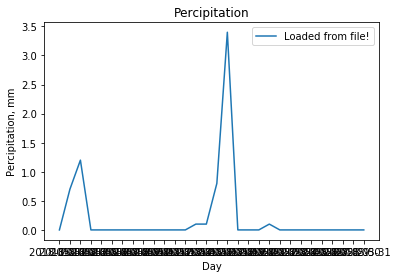

In [41]:
x = []
percip = []


with open('wwo_data/riga.csv','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    next(csvfile, None) # skip labels
    for row in plots:
        x.append(row[0])
        percip.append(float(row[19]))

plt.plot(x,percip, label='Loaded from file!')
plt.xlabel('Day')
plt.ylabel('Percipitation, mm')
plt.title('Percipitation')
plt.legend()
plt.show()

/Users/jtone/Documents/Studies/Python/py-project


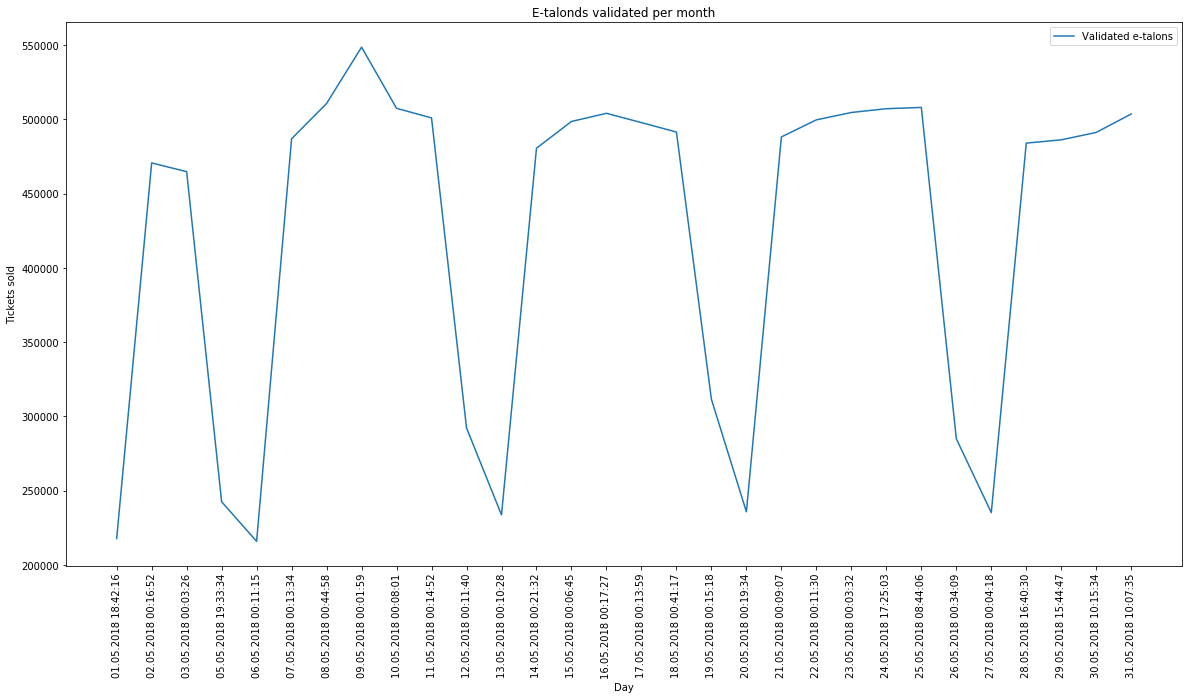

In [54]:
print(os.getcwd())
work_dir = "RS_open_data/validacijudati05_2018/"

# file = "ValidDati15_05_18.txt"
files = os.listdir(work_dir)
files.sort()

x = []
validation_cnt = []

for file in files:
    with open(work_dir + file) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        next(csv_reader, None)
        for row in csv_reader:
            x.append(row[8])
            validation_cnt.append(sum(1 for row in csv_reader) - 1)
    
plt.figure(figsize=(20,10))
plt.plot(x,validation_cnt, label='Validated e-talons')
plt.xlabel('Day')
plt.xticks(rotation=90)
plt.ylabel('Tickets sold')
plt.title('E-talonds validated per month')
plt.legend()
plt.show()

/Users/jtone/Documents/Studies/Python/py-project


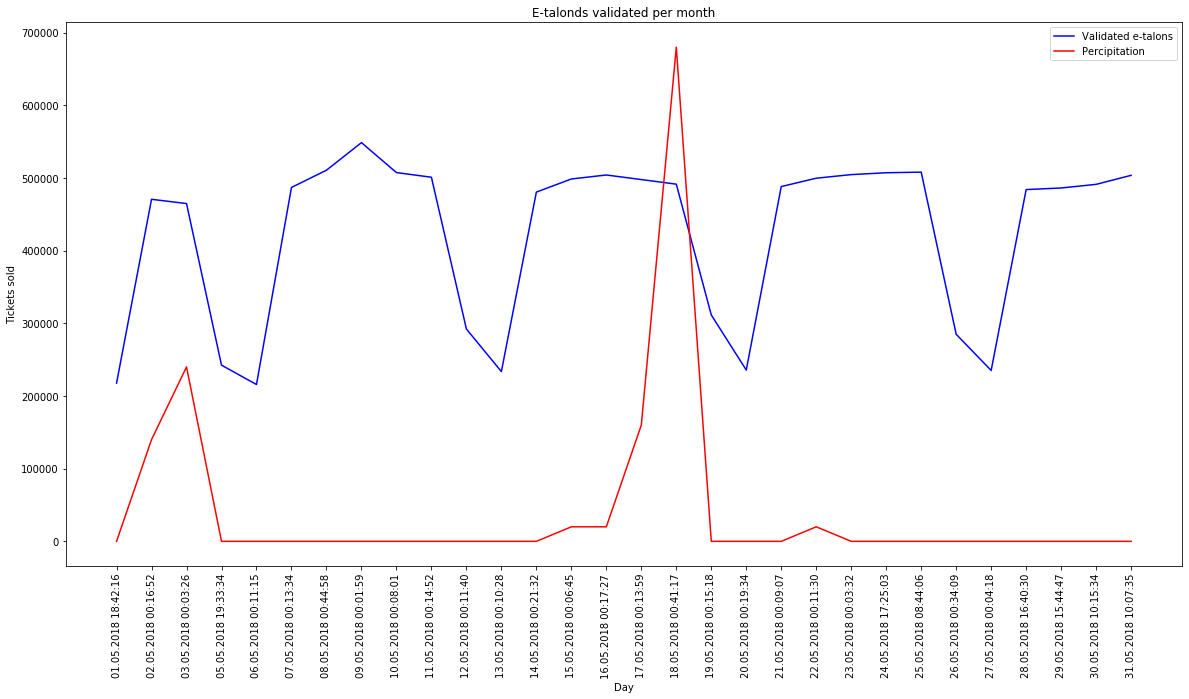

In [53]:
print(os.getcwd())
work_dir = "RS_open_data/validacijudati05_2018/"

files = os.listdir(work_dir)

# haven't yet mastered 2 scales in one graph
percip_scaled = [i * 200000 for i in percip]
    
plt.figure(figsize=(20,10))
plt.plot(x, validation_cnt , label='Validated e-talons', color='blue')
plt.plot(x, percip_scaled, label='Percipitation', color='red')
plt.xlabel('Day')
plt.xticks(rotation=90)
plt.ylabel('Tickets sold')
plt.title('E-talonds validated per month vs Percipitation')
plt.legend()
plt.show()

In [71]:
import folium
import numpy as np
import random

In [103]:
riga_lat = 56.94
riga_lon = 24.11
zoom = 12

In [109]:
# FIRST ROUTE MAP

all_points = []

with open('RS_open_data/marsrutusaraksti05_2018/shapes.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    
#     init map
    route_map = folium.Map(location=[riga_lat, riga_lon], zoom_start=zoom)
    
    next(csv_reader, None)
    for row in csv_reader:
        all_points.append(tuple([float(row[1]), float(row[2])]))
        prev_row = row
        
folium.PolyLine(all_points, color='red', weight=2.5).add_to(route_map)

# save map
route_map.save("./route_map_A.html")

In [110]:
# THE GOOD ROUTE MAP
points = []

with open('RS_open_data/marsrutusaraksti05_2018/shapes.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    
#     init map
    route_map = folium.Map(location=[riga_lat, riga_lon], zoom_start=zoom)
    
    prev_row = next(csv_reader, None)  # skip the labels
    prev_row[3] = -1
    
    for row in csv_reader:
#         print(f'ROW {", ".join(row)}')
              
        if int(row[3]) > int(prev_row[3]):
              points.append(tuple([float(row[1]), float(row[2])]))
        else:
#             plot the points on the map
            folium.PolyLine(points, color='red', weight=2.5, opacity=0.2).add_to(route_map)
              
            points = []

        prev_row = row

# save map
route_map.save("./route_map.html")

In [104]:
from folium import plugins
from folium.plugins import HeatMap

In [127]:
# STOP HEATMAP
stops = []

with open('RS_open_data/marsrutusaraksti05_2018/stops.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    
#     init map
    stop_map = folium.Map(tiles='stamentoner', location=[riga_lat, riga_lon], zoom_start=zoom)
    
    next(csv_reader, None)  # skip the labels
    for row in csv_reader:
        # heatmap tuple: [lat, lon, weight] 
        stops.append(tuple([float(row[4]), float(row[5]), 1]))

HeatMap(stops).add_to(stop_map)

# save map
stop_map.save("./stop_map.html")